Neural network using Keras for classification

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve


In [0]:
df= pd.read_csv('songs_complete_data.csv')

In [0]:
df=df.drop(['lyrics','explicit','Genre','Release_Year'],axis=1)

In [0]:
df['Norm_Duration']= (df['Duration']-224296.087)/9233

In [0]:
df=df.drop(['Duration'],axis=1)

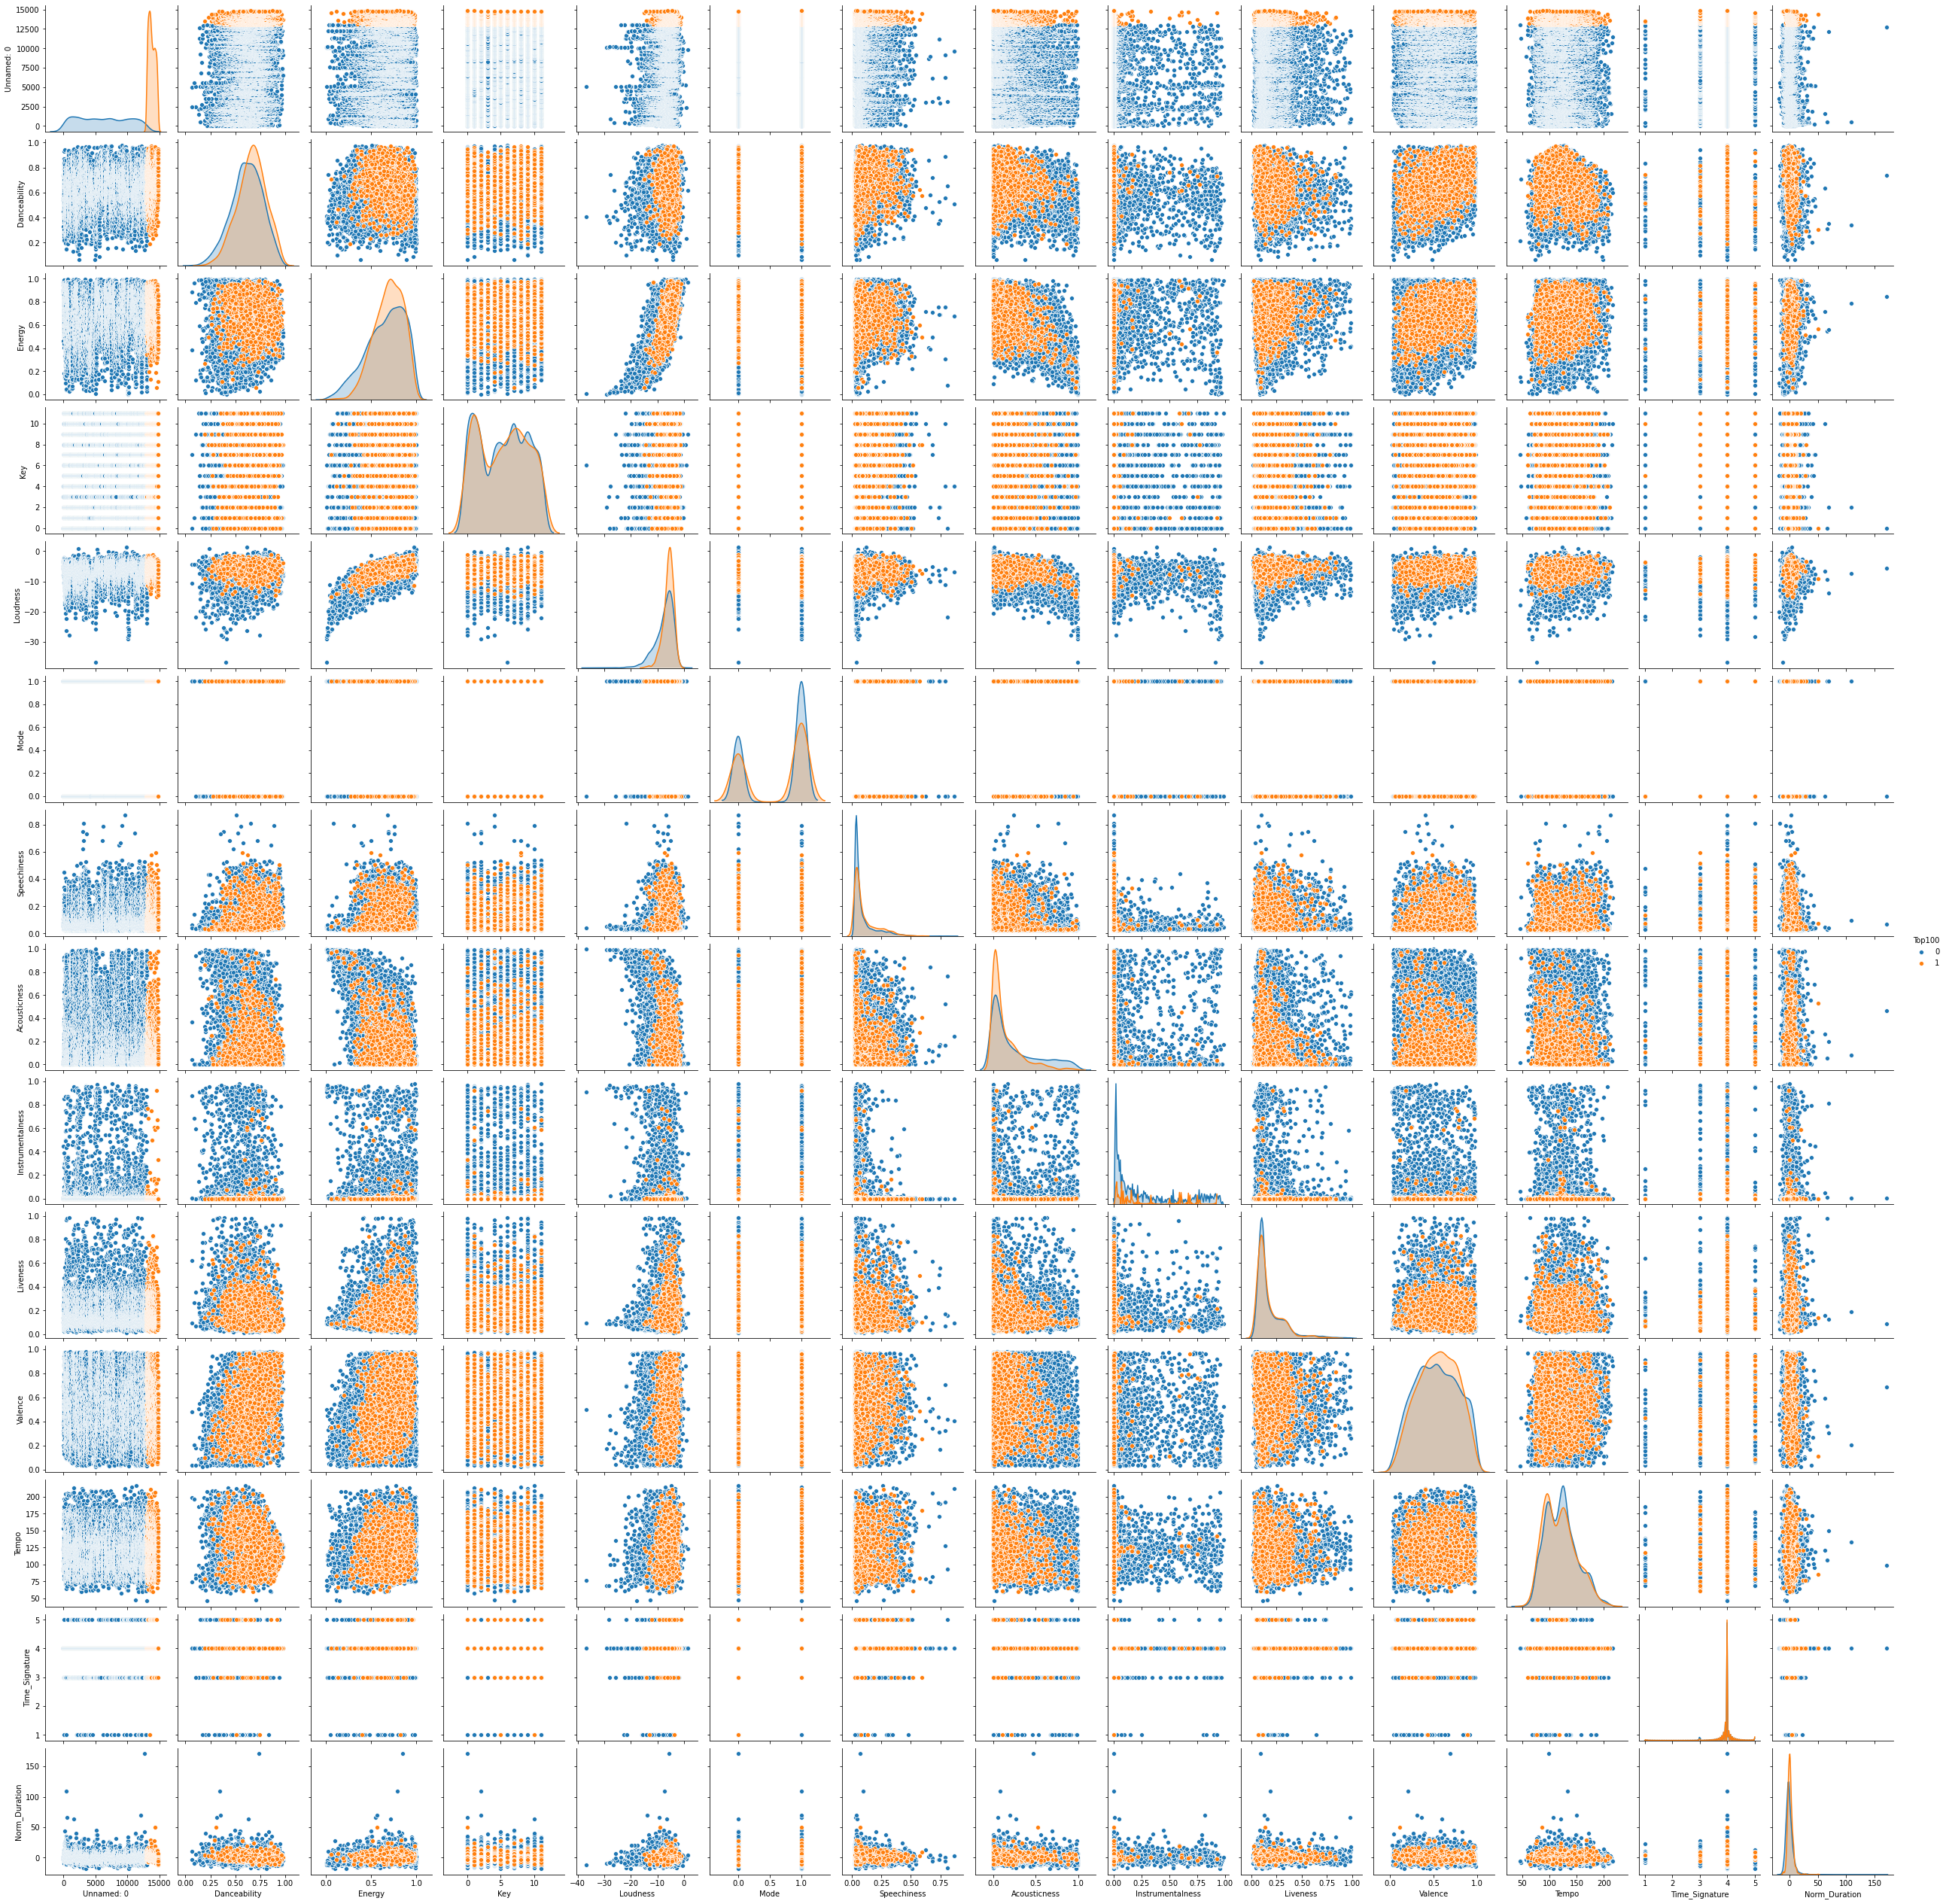

In [0]:
sns.pairplot(df, hue='Top100')

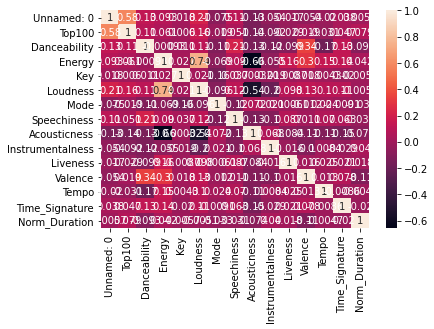

In [0]:
sns.heatmap(df.corr(), annot=True)

In [0]:
y=df['Top100'].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [0]:
values=df.values
x=values[:,5:18]
x

array([[0.556, 0.8640000000000001, 3.0, ..., 105.143, 4.0,
        -0.8032153146322971],
       [0.737, 0.463, 0.0, ..., 123.881, 4.0, 0.8054709195277808],
       [0.451, 0.97, 0.0, ..., 122.444, 4.0, -0.7974750351998267],
       ...,
       [0.872, 0.8140000000000001, 0.0, ..., 98.985, 4.0,
        -2.6935001624607384],
       [0.6459999999999999, 0.7809999999999999, 1.0, ..., 94.975, 4.0,
        -5.889319506119355],
       [0.652, 0.453, 1.0, ..., 88.038, 3.0, -5.080156720459223]],
      dtype=object)

In [0]:
from sklearn.model_selection import train_test_split 
  
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

Applying SMOTE

In [0]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
sm = SMOTE()
X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 53kB/s 
     |████████████████████████████████| 491kB 59.0MB/s 
     |████████████████████████████████| 3.2MB 41.7MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow 2.2.0rc1
    Uninstalling tensorflow-2.2.0rc1:
      Successfully uninstalled tensorflow-2.2.0rc1


In [0]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(6, activation='sigmoid', kernel_initializer='random_normal', input_dim=13))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [0]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#Fitting the data to the training dataset
classifier.fit(X_train_oversampled, y_train_oversampled, batch_size=10, epochs=100)


Epoch 1/100
11160/11160 [==============================] - 2s 136us/step - loss: 0.6662 - acc: 0.6142
Epoch 2/100
11160/11160 [==============================] - 1s 117us/step - loss: 0.6241 - acc: 0.6508
Epoch 3/100
11160/11160 [==============================] - 1s 118us/step - loss: 0.6151 - acc: 0.6576
Epoch 4/100
11160/11160 [==============================] - 1s 116us/step - loss: 0.6012 - acc: 0.6772
Epoch 5/100
11160/11160 [==============================] - 1s 119us/step - loss: 0.5842 - acc: 0.6953
Epoch 6/100
11160/11160 [==============================] - 1s 117us/step - loss: 0.5770 - acc: 0.6959
Epoch 7/100
11160/11160 [==============================] - 1s 118us/step - loss: 0.5728 - acc: 0.7027
Epoch 8/100
11160/11160 [==============================] - 1s 118us/step - loss: 0.5707 - acc: 0.7021
Epoch 9/100
11160/11160 [==============================] - 1s 117us/step - loss: 0.5669 - acc: 0.7007
Epoch 10/100
11160/11160 [==============================] - 1s 114us/step - loss:

In [0]:
eval_model=classifier.evaluate(X_train_oversampled, y_train_oversampled)
eval_model

11160/11160 [==============================] - 0s 19us/step


[0.4942506703210988, 0.7579749103515379]

In [0]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix of Artificial Neural Network')
print(cm)

Confusion matrix of Artificial Neural Network
[[1497  898]
 [ 109  266]]
